In [1]:
from IPython.display import display;

import numpy as np;
import pandas as pd;

In [2]:
class MultipleRegression:
    def __init__(self, inputs):
        np.random.seed(0);
        self.x = inputs;
        self.m = np.random.randn(self.x.ndim);
        self.b = np.random.randn(len(self.x));
        self.grad = {};
    
    def forward(self):
        output = [];
        
        output.append(self.b);
        for i in range(self.x.ndim):
            imdt = self.m[i] * self.x[:, i];
            output.append(imdt);
        
        self.output = np.sum(output, axis=0);
        
        return self.output;
    
    def error(self, y):
        err = (self.output - y) ** 2;
        err = np.mean(err);
        
        return err;
    
    def error_derivative(self, y):
        # for each theta, find error
        # theta0 is b
        self.dE_dm = {};
        
        self.dE_dm[0] = (self.output - y);
        self.dE_dm[0] = np.mean(self.dE_dm[0]);
        
        for i in range(self.x.ndim):
            dE_imdt = (self.output - y) * self.m[i];
            dE_imdt = np.mean(dE_imdt);
            self.dE_dm[i + 1] = dE_imdt;
        
        return self.dE_dm;
    
    def train(self, y, epochs, lr=0.0001):
        for i in range(epochs):
            self.output = self.forward();
            err = self.error(y);
            derv = self.error_derivative(y);
            # access i + 1 in the dictionary of derivatives since
            # theta0 is reserved for constant b
            for i in range(self.x.ndim):
                self.m[i] = self.m[i] - (lr * derv[i + 1]);
            self.b = self.b - (lr * derv[0]);
        
        return err;

In [3]:
clocks = pd.read_csv('clocks.tsv', sep='\t');

display(clocks.head());

X = clocks[['Age', 'Bidders']].values;
y = clocks['Price'].values;

print(y.shape);

,Age,Bidders,Price
0,127,13,1235
1,115,12,1080
2,127,7,845
3,150,9,1522
4,156,6,1047


(32,)


In [4]:
mreg = MultipleRegression(inputs=X);

err = mreg.train(y, epochs=100);
display(err);

69100.1549063639

In [5]:
y_pred = mreg.forward();

temp = np.array([y, y_pred]).T;

comparison = pd.DataFrame(data=temp, columns=['actual', 'predicted']);

display(comparison);

,actual,predicted
0,1235.0,1173.349020
1,1080.0,1064.461984
2,845.0,1161.976512
3,1522.0,1370.421257
4,1047.0,1420.270778
5,1979.0,1663.615987
6,1822.0,1431.478799
7,1253.0,1211.694232
8,1297.0,1254.428138
9,946.0,1039.527094


In [6]:
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D;

%matplotlib inline

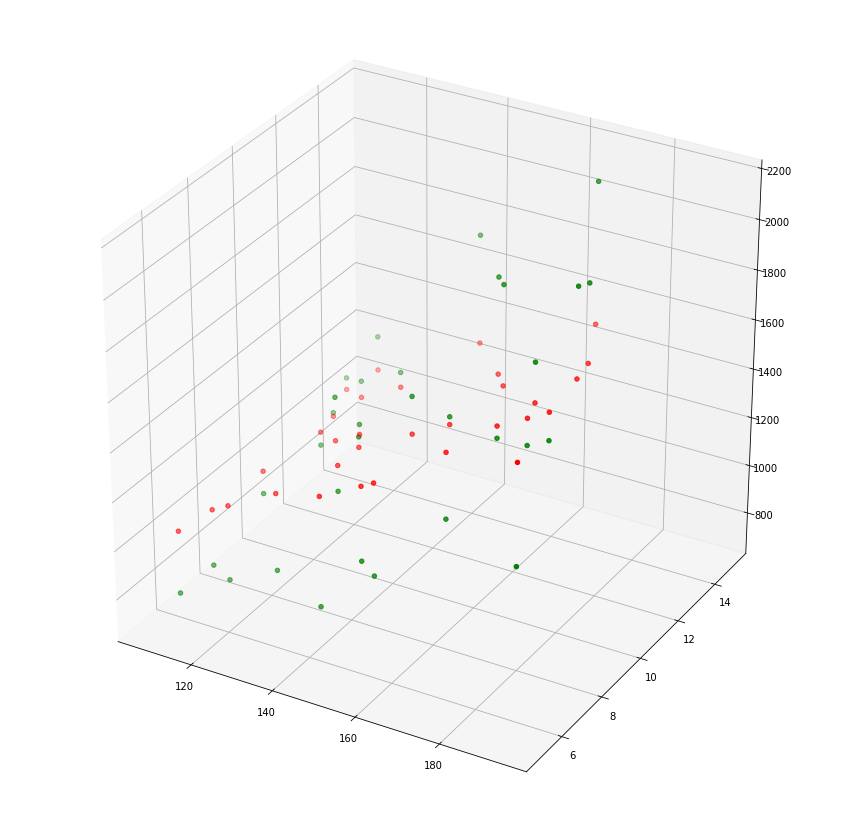

In [7]:
plt.figure(figsize=(15, 15));
ax = plt.axes(projection='3d');

ax.scatter(X[:, 0], X[:, 1], y, color='green');
ax.scatter(X[:, 0], X[:, 1], y_pred, color='red');
plt.show();